In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras as K
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import load_img
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pickle

In [ ]:
%cd /content/drive/MyDrive
model = tf.keras.models.load_model("FireDetection")

/content/drive/MyDrive


In [ ]:
test_dir = '/content/drive/MyDrive/Test/'
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  )
test_generator =test_datagen.flow_from_directory(test_dir,
                                                  batch_size=16,
                                                  class_mode ='categorical',
                                                  target_size=(224,224),
                                                  shuffle = True)

Found 1472 images belonging to 2 classes.


In [ ]:
labels = test_generator.classes
preds = model.predict(test_generator)
correct = 0
for i in range(labels.size):
  ilabel = 1
  if preds[i][0] > preds[i][1]:
    ilabel = 0
  if labels[i] == ilabel :
    correct = correct + 1

print(correct/ (labels.size))

0.6664402173913043


In [ ]:
correct = 0
for i in range(92) :
  test_x, test_y = test_generator.__getitem__(i)
  preds = model.predict(test_x)
  for i in range(preds.shape[0]):
    if np.argmax(preds[i]) == np.argmax(test_y[i]):
      correct += 1
print( correct/ test_generator.n)

0.9055706521739131


{0: 'Fire', 1: 'Neutral'}
32
1472
32


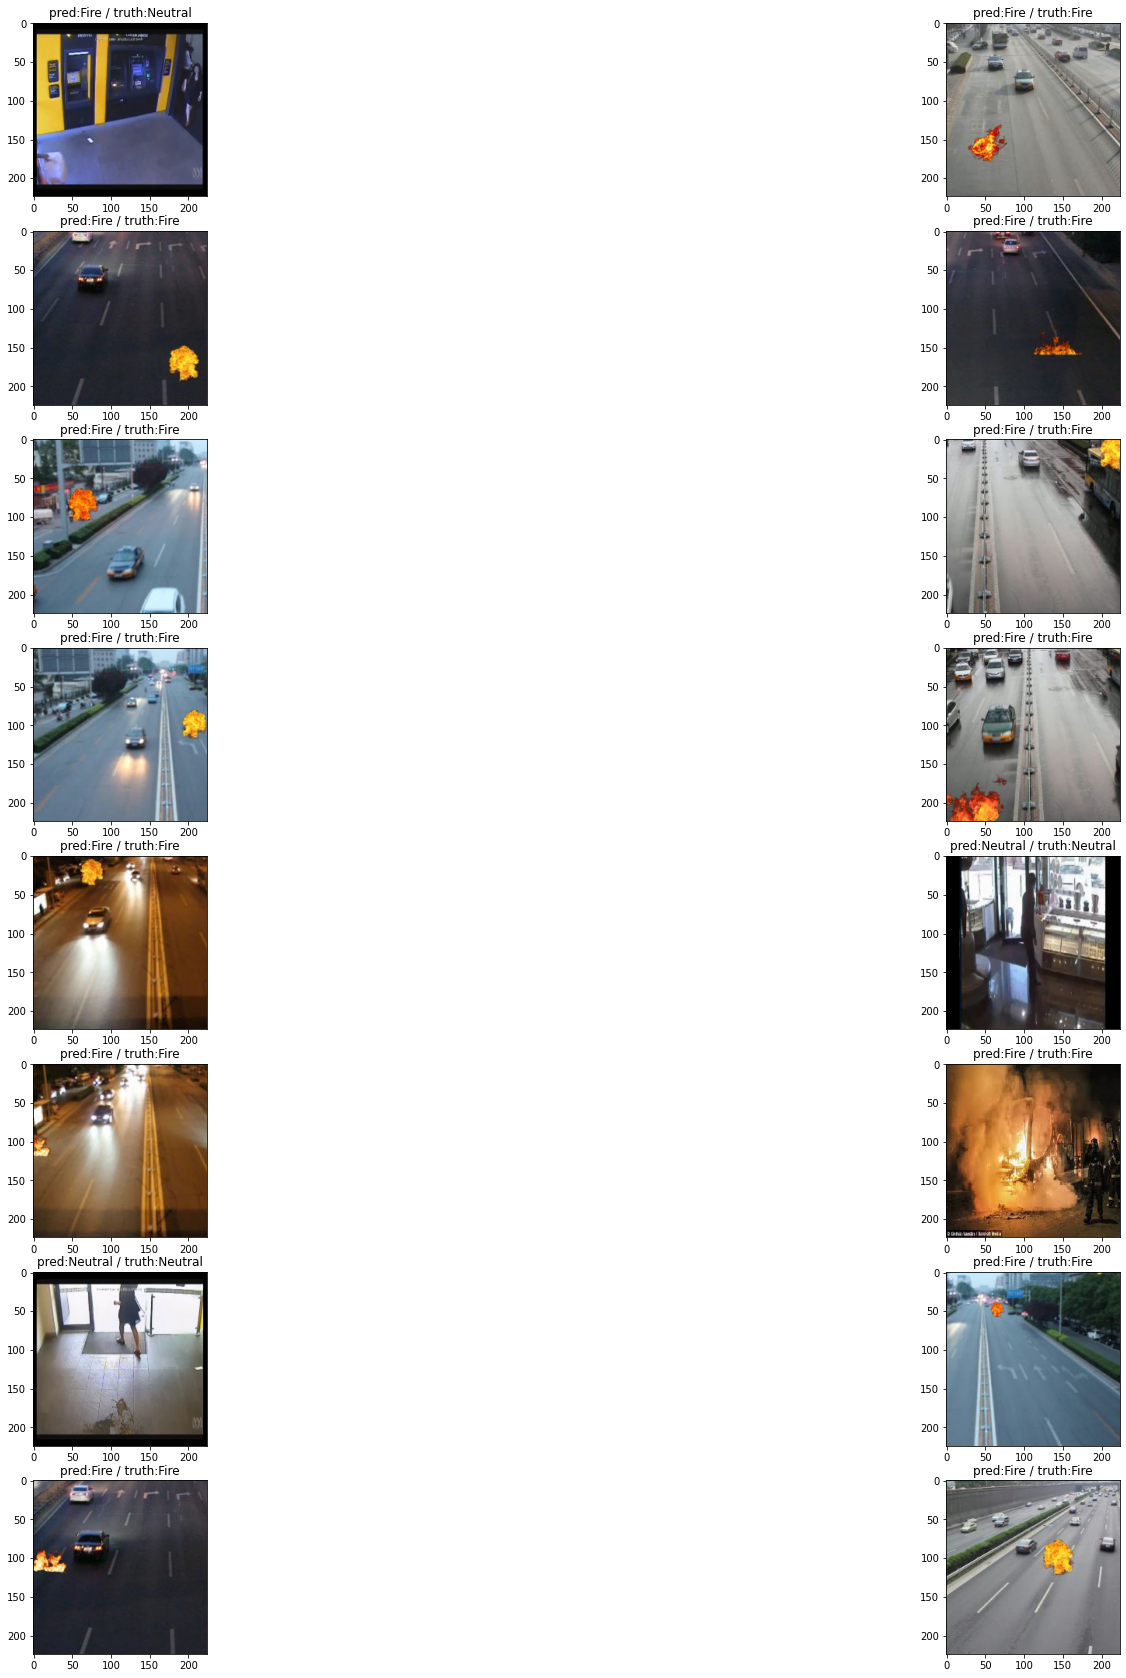

In [ ]:
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
test_x, test_y = test_generator.__getitem__(30)
print(labels)
print(test_y.size)
print(test_generator.n)
preds = model.predict(test_x)
print(preds.size)
plt.figure(figsize=(30,30))
for i in range(16):
    plt.subplot(8, 2, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [ ]:
def check_area(image):
  frame = image
  frame = cv2.resize(frame, (500, 500))
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  hl = 0
  sl = 0
  vl = 246
  hh = 255
  sh = 255
  vh = 255

  low = np.array([hl, sl, vl])
  high = np.array([hh, sh, vh])

  mask = cv2.inRange(hsv, low, high)

  _, thresh = cv2.threshold(mask, 125, 255, cv2.THRESH_BINARY)
  contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  totalArea = 0
  for i in range(0, len(contours)):
      approx = cv2.approxPolyDP(contours[i], 0.01 * cv2.arcLength(contours[i], True), True)
      area = cv2.contourArea(contours[i])
      totalArea = totalArea + area
      cv2.drawContours(frame, contours, i, (0, 255, 0), 2)

  #cv2_imshow( mask)
  #cv2_imshow(frame)
  t = 1
  return (totalArea/2500)

def cost_calc(arr, image):
  cost=0
  if arr == 'Fire' :
    cost = check_area(image)
  return cost

def fire(filename):
  imag = cv2.imread(filename)
  #cv2_imshow(imag)

  image_path = filename
  img = load_img(image_path, target_size = (224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x/255
  p = model.predict(x)
  #print(p)
  i = np.argmax(p,1).squeeze()
  i = int(i)
  #print(labels[i])
  return cost_calc(labels[i], imag)

In [ ]:
fire('/content/drive/MyDrive/fire.jpg')

0.0088

In [ ]:
!pip show keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, pyyaml, scipy, h5py
Required-by: textgenrnn, keras-vis, kapre, fancyimpute
